# Geospatial data movie creator - integrated stats for time series
Presenting geospatial data to an audience over a long time span always being a challenge for geospatial data scientists. For a complete presentation, elaboration of both spatial and time components is a mandatory task. This code satisfies it, by creating an image time series and extracted stat data visualization burned into a single gif image.


In [1]:
#imports
import os
import glob

# import raster packages
import rasterio as ras
from rasterio.plot import show
from rasterstats import zonal_stats
import PIL
import imageio

# import for vector data
import geopandas as gpd
import pandas as pd

# visulatization
#from bokeh.plotting import figure
#from bokeh.io import notebook, show
#from bokeh.io import output_file, save
from matplotlib import pyplot as plt


%matplotlib inline



## functionality for image and graph plotting
1. extracting data from data frames 2. making subplots 3. burn image and graph into a single png
#### Those pngs will be used for generation of the gif 

In [10]:
# custom functions for graphics
def plot_graphics(dr_df, display_band, start_date, end_date):
    # x,and y axis data declaration
    x = dr_df.day
    yc = dr_df.Corn
    yg = dr_df.Grass
    ys = dr_df.Soybean
    yw = dr_df.Winterwheat
    
    #declaration of the figure
    fig, ax = plt.subplots(figsize=(12,8))
    
    # plot 1- image
    plt.subplot(211) 
    plt.imshow(display_band, cmap='nipy_spectral', vmin=0, vmax=6)
    clb = plt.colorbar(orientation="vertical", shrink=0.75, fraction=0.2)
    clb.set_label('ET(mm/day)', labelpad=-40, y=0.5, rotation=90)
    plt.title(str(i)+" - day of 2018", loc='left', pad=0.5)
    
    # plot 2- graph
    plt.subplot(212)
    plt.plot(x, yc, '-', label='corn', color='yellow',marker='o', linestyle='-', linewidth=2, alpha=0.8)
    plt.plot(x, ys, '-', label='soy', color='lawngreen', marker='o', linestyle='-', linewidth=2, alpha=0.8)
    plt.plot(x, yw, '-', label='winterwheat', color='firebrick',marker='o', linestyle='-', linewidth=2, alpha=0.8)
    plt.plot(x, yg, '-', label='grass', color='darkgreen', marker='o', linestyle='-',  linewidth=2, alpha=0.8)

    plt.ylim(0, 6)
    plt.xlim(start_date, end_date)
    leg = plt.legend(bbox_to_anchor=(0.05, 1.7), loc='upper left', title="Land cover", fontsize=14)
    leg.set_title("Land cover", prop={'size':16})
    plt.ylabel("ET(mm/day)", fontsize=16)
    plt.xlabel("Julian Day of the year", fontsize=16)
    plt.grid(True, which='major', axis='y', color='k', linestyle='--', linewidth=0.4)
    
    plt.subplots_adjust(bottom=0.1, right=1, top=0.9)
    plt.savefig("C:\\Users\\User\\Desktop\\temp\\dynamicplot"+str(i)+".png", dpi=150)
    #plt.show()

print("function loded")

function loded


#### USER input here

In [3]:
#######################################
#         USER INPUT HERE             #   
#                                     #
#######################################
start_date = 214
end_date = 242

# image to import georeference CRS info
gref_source = ras.open("F:\\research_image\\EVI\\EVI.tif")
print("image found")

# here you can set project folder for I/O. Anyway for convinience read the code and setup folder path as your requrement

image found


- take already georeferenced image and transfer CRS info to non georef images.
- Loading zonal shape file (this file includes zones for extract informations)

In [6]:
gref_profile = gref_source.profile
# image affine
affine_dt = gref_profile['transform']
print("wait to save georeferenced images")


# reading rasters in .img format and plotting them and save as pngs
for i in range(start_date, end_date):
    file_name = 'F:\\research_image\\Agust\\beps_daily2009\\nochange\\'+'et'+str(i)+'.img'
    #print(file_name)
    # open file and band
    img_file = ras.open(file_name)
    display_band = img_file.read(1)
    #print(display_band)
    
    # saving the gref image
    with ras.open("C:\\Users\\User\\Desktop\\temp\\"+"et"+str(i)+".tif", 'w', **gref_profile) as dst:
        dst.write(display_band, 1)
        #print("copy {val} saved".format(val=i))
    
print("**********************************************")
print("********* georefed copy saving done **********")

print("loading zones")
# open zone file (more automation can be done here)
zone_aoi = gpd.read_file("C:\\Users\\User\\Desktop\\temp\\zones\\LS_Shp_New.shp")
zone_1 = zone_aoi[zone_aoi.LC_zone=='Corn']
zone_2 = zone_aoi[zone_aoi.LC_zone=='Soybean']
zone_3 = zone_aoi[zone_aoi.LC_zone=='Winterwheat']
zone_4 = zone_aoi[zone_aoi.LC_zone=='Grass']

zone_list = [zone_1, zone_2, zone_3, zone_4 ]

print("**********************************************")
print("***************   zones loded ****************")

wait to save georeferenced images
**********************************************
********* georefed copy saving done **********
loading zones
**********************************************
***************   zones loded ****************


### Iterate over images and collect stats and image data to transfer them to plots

In [7]:
import warnings

wait to save images/plots
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
******************************************
*********** Task completed ***************


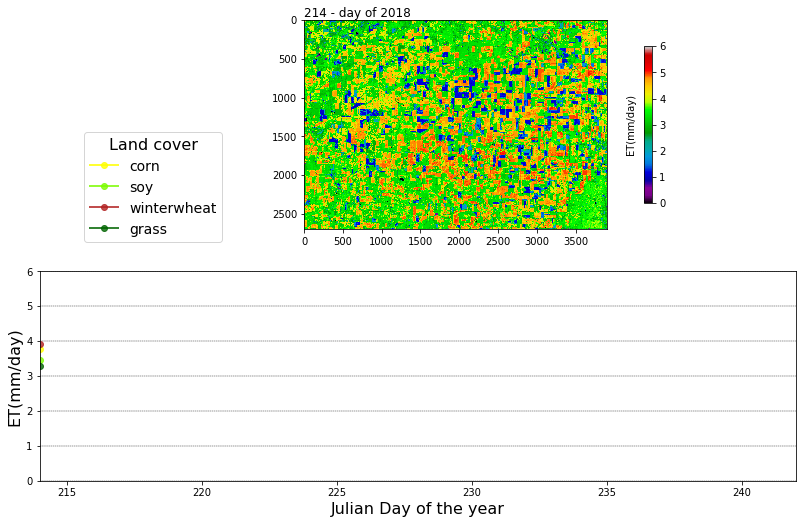

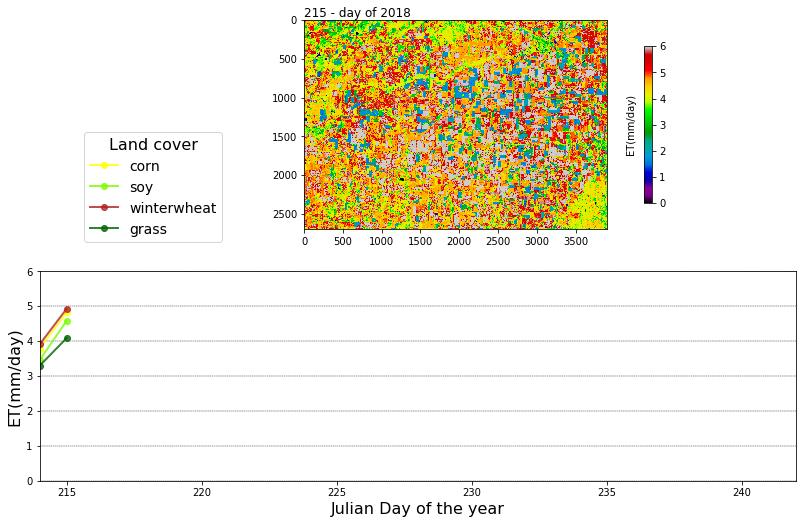

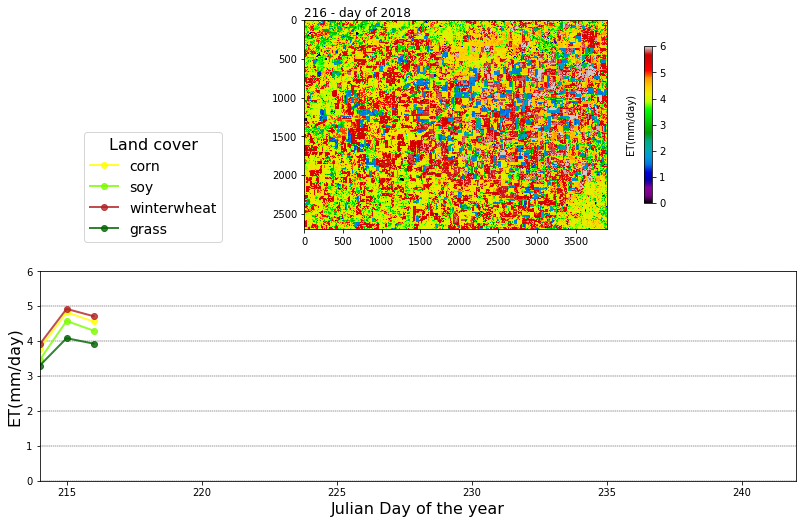

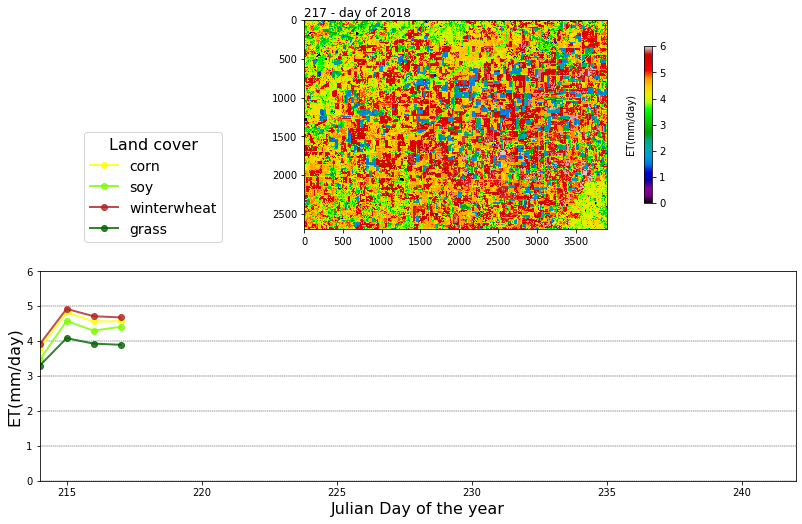

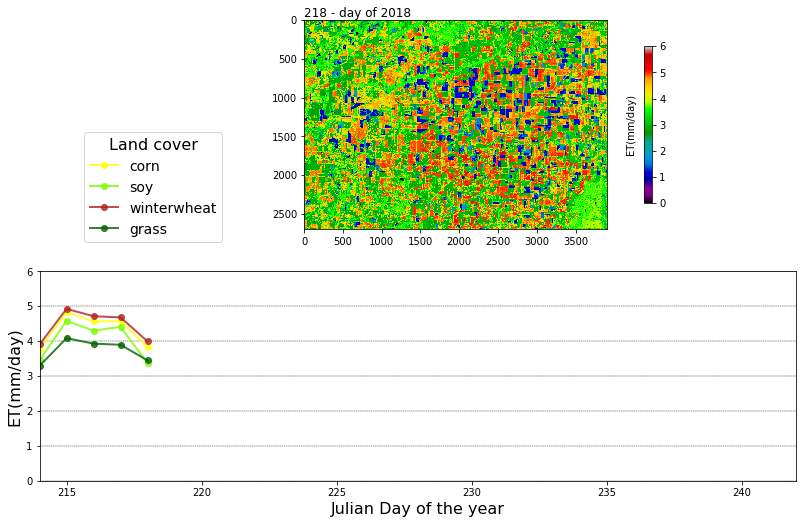

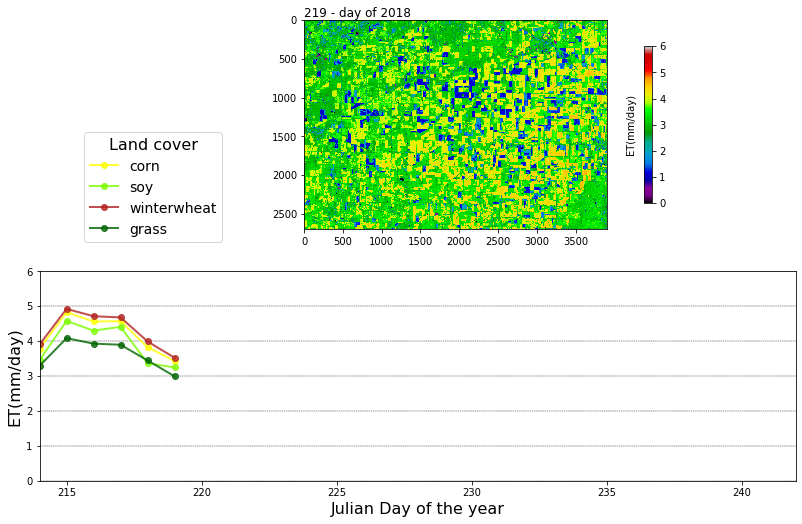

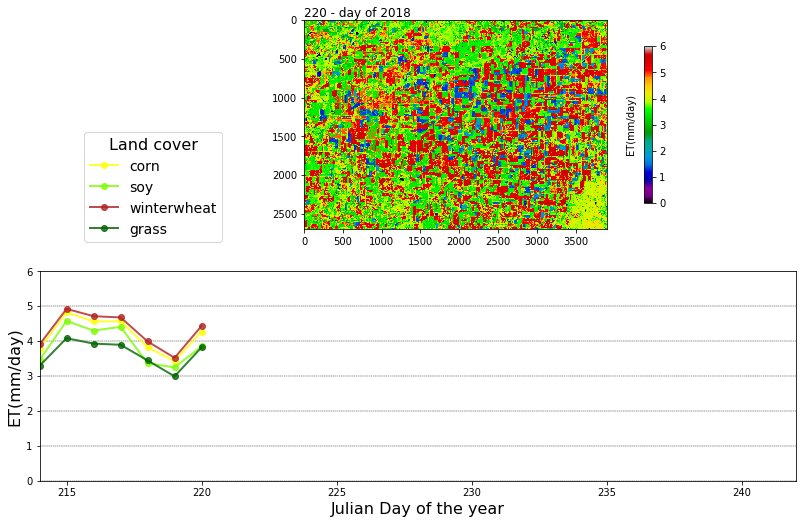

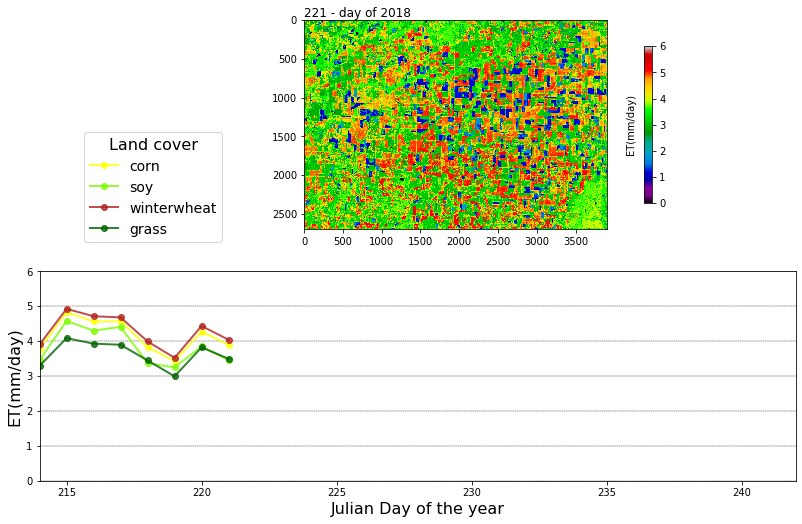

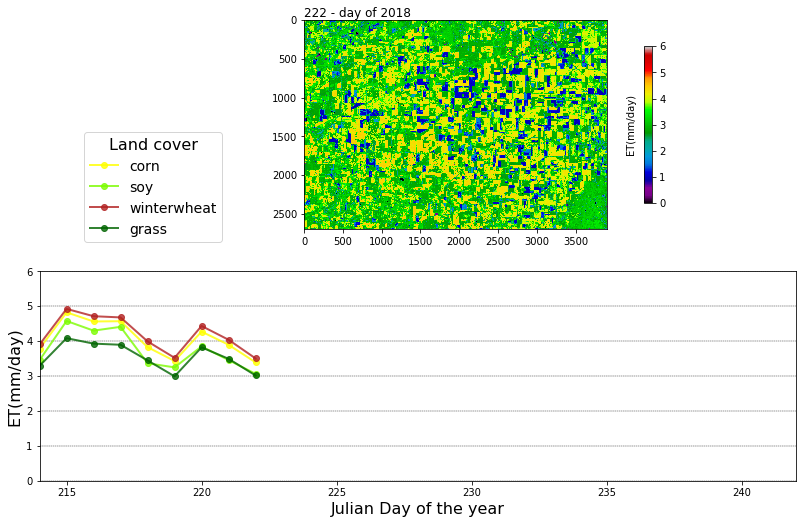

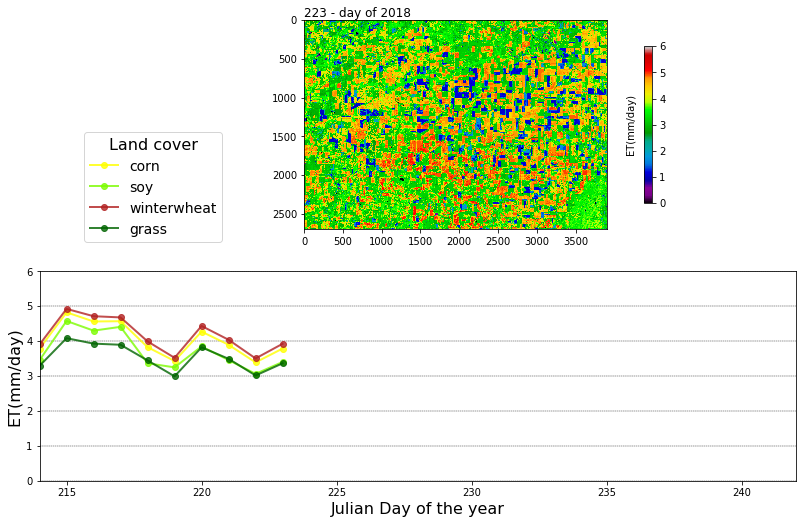

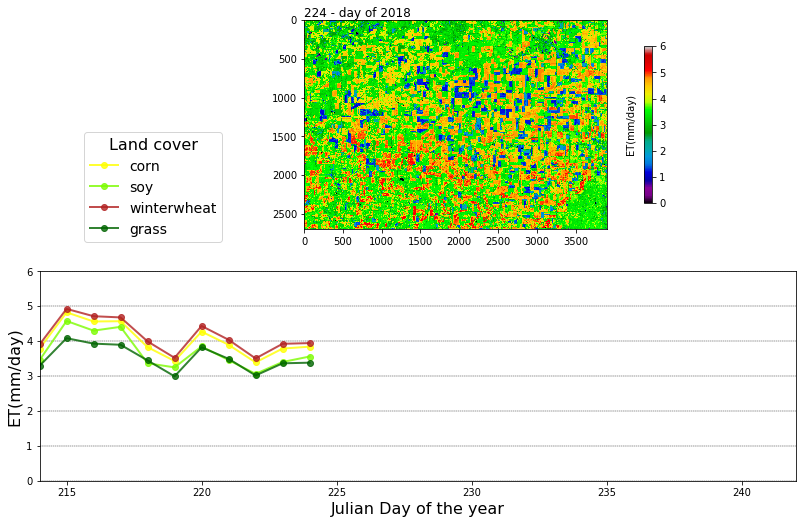

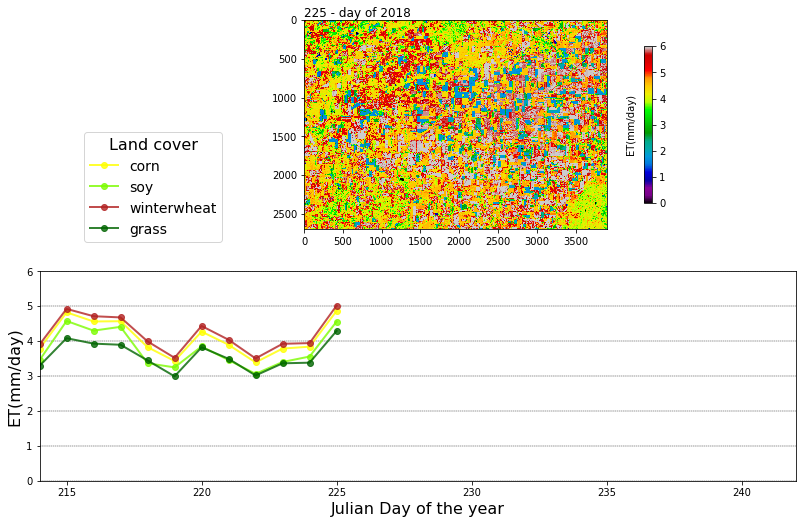

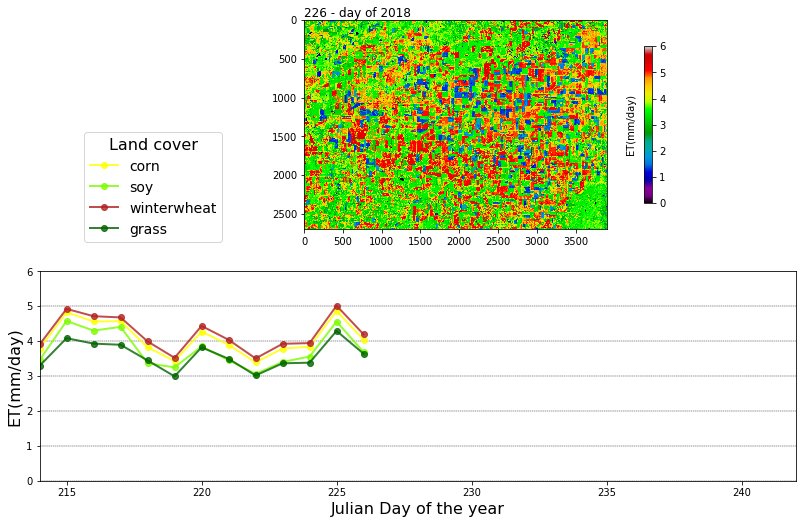

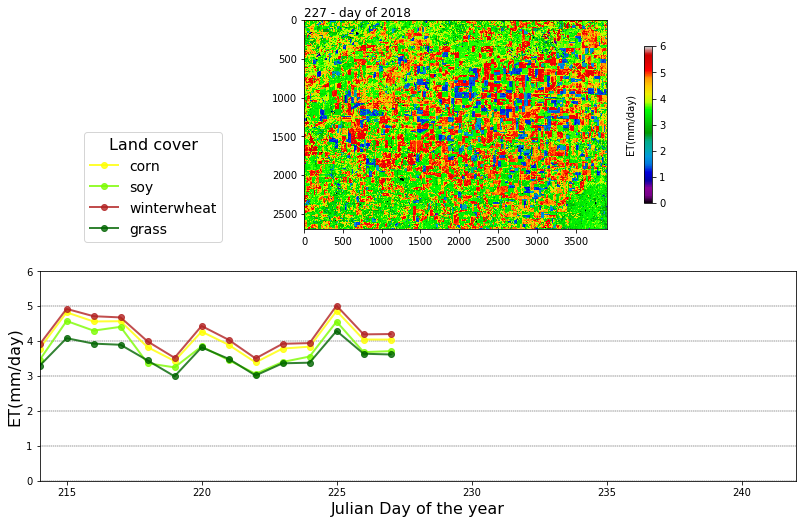

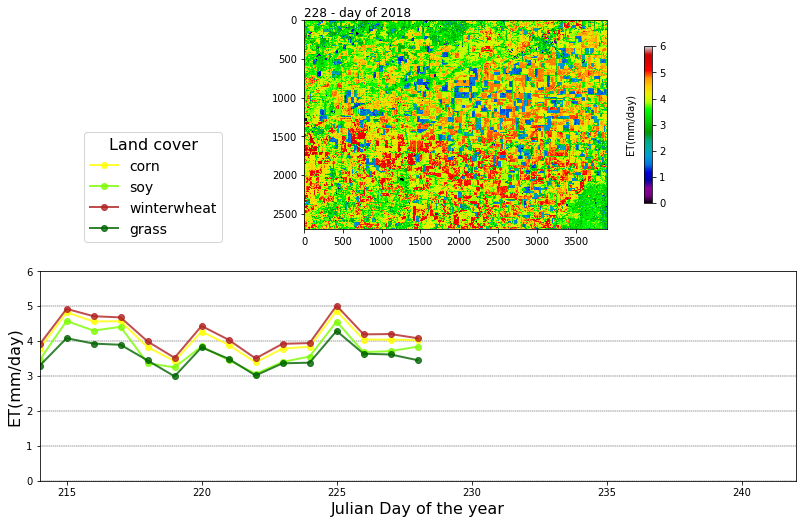

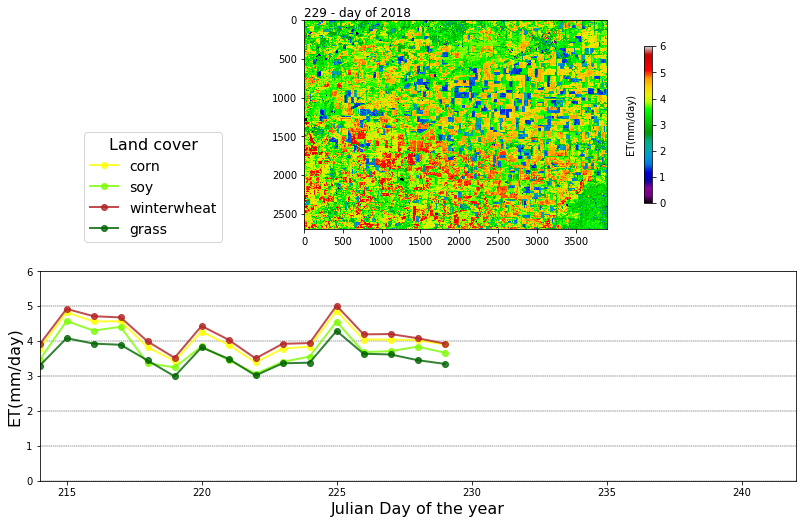

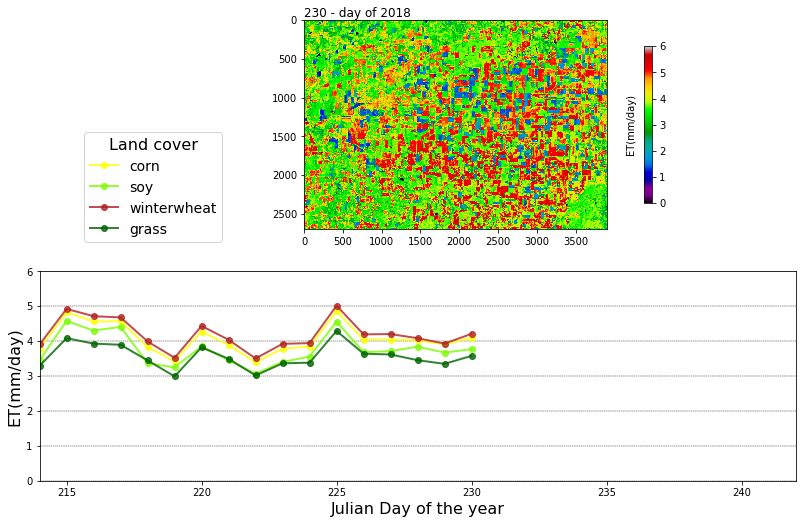

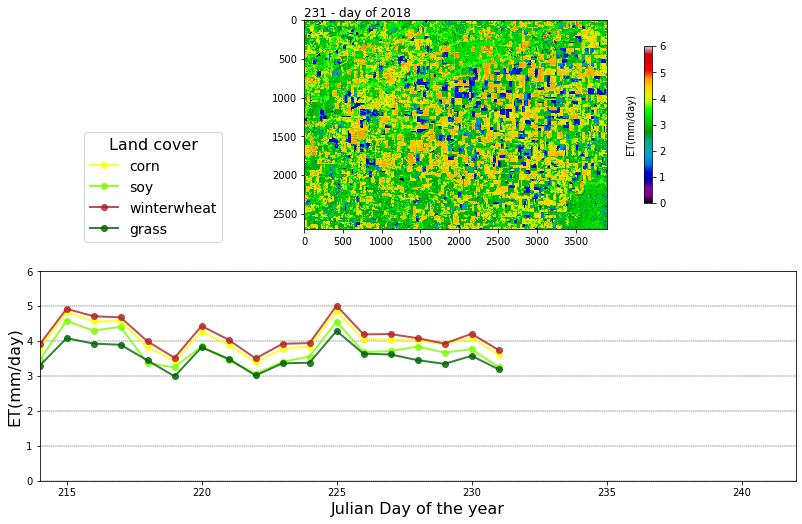

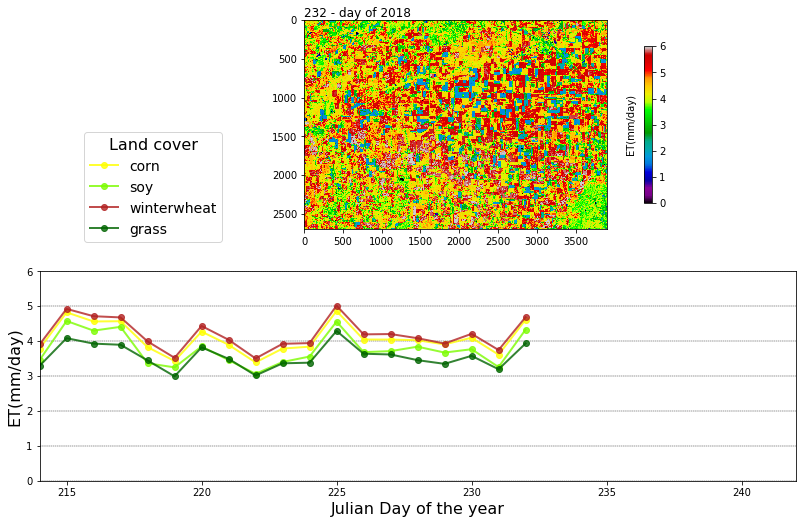

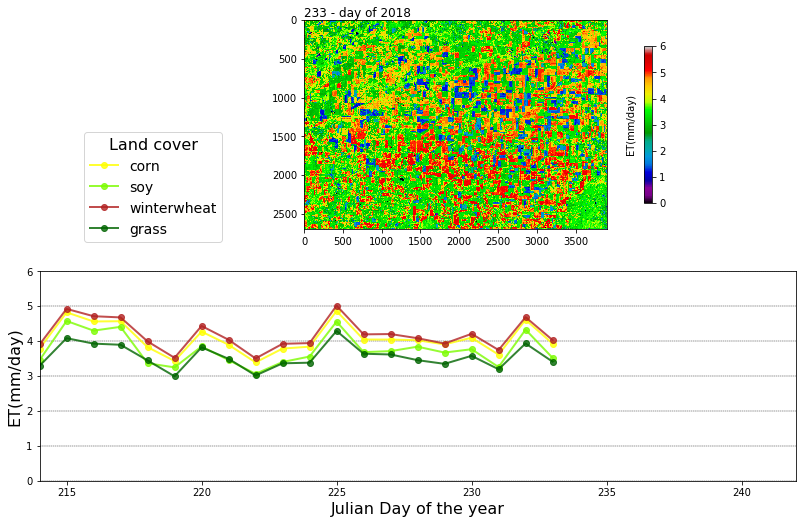

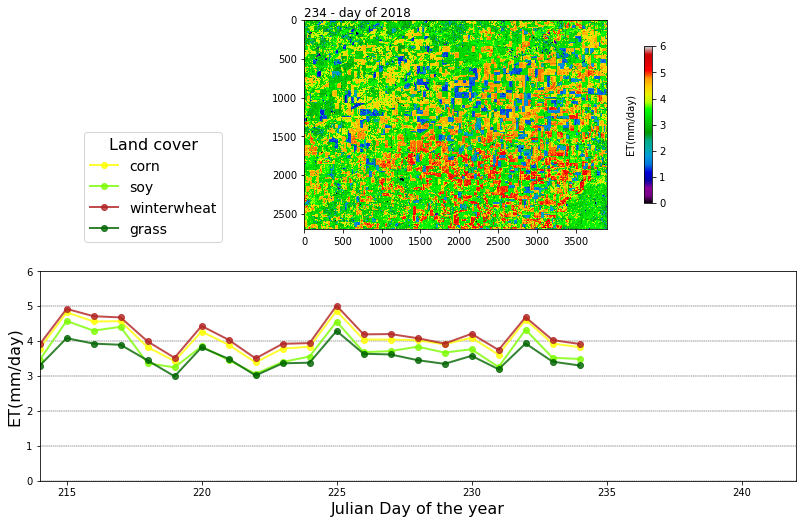

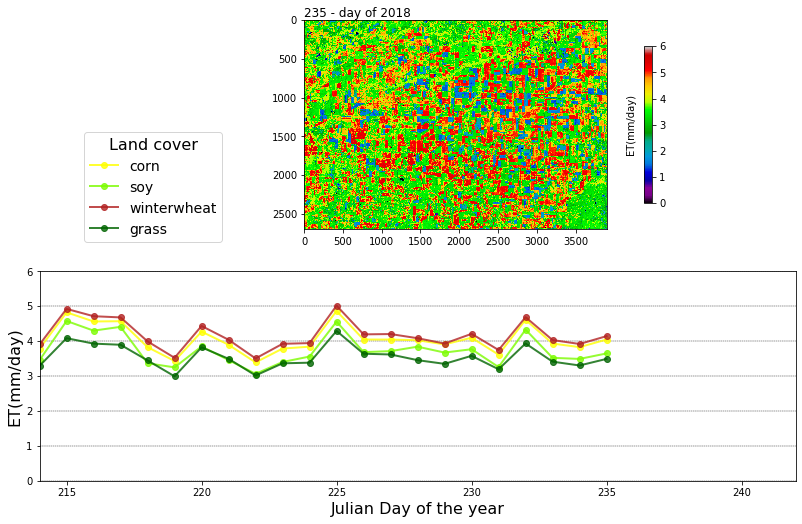

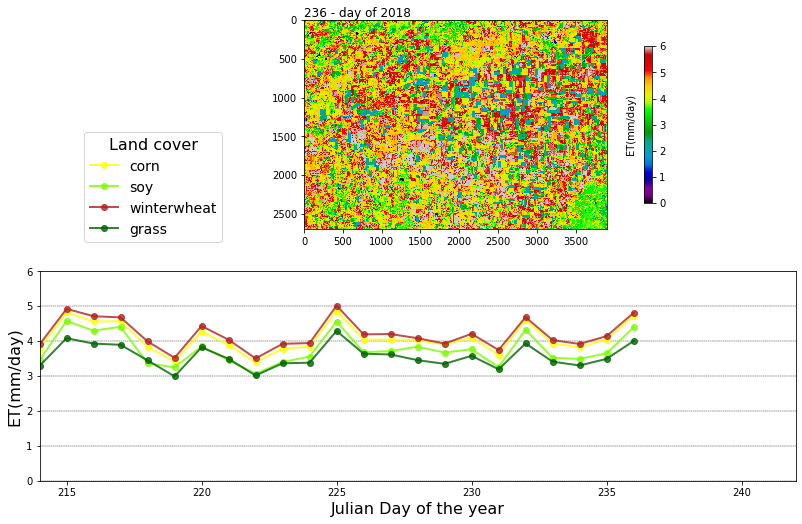

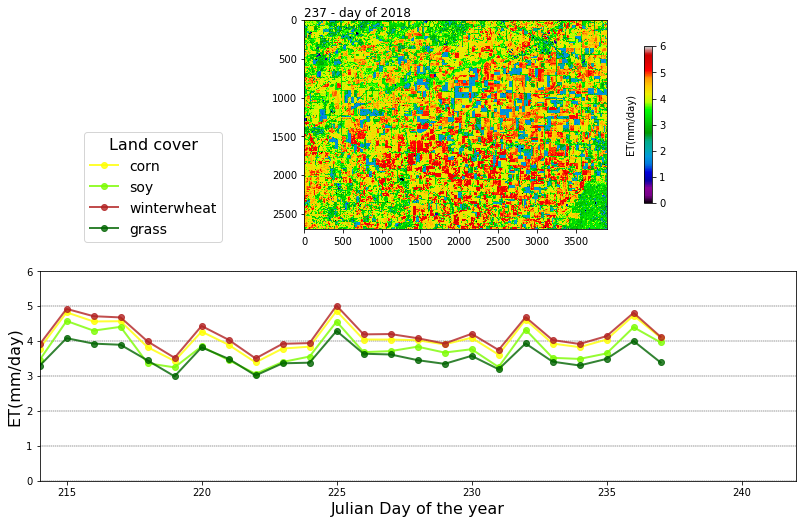

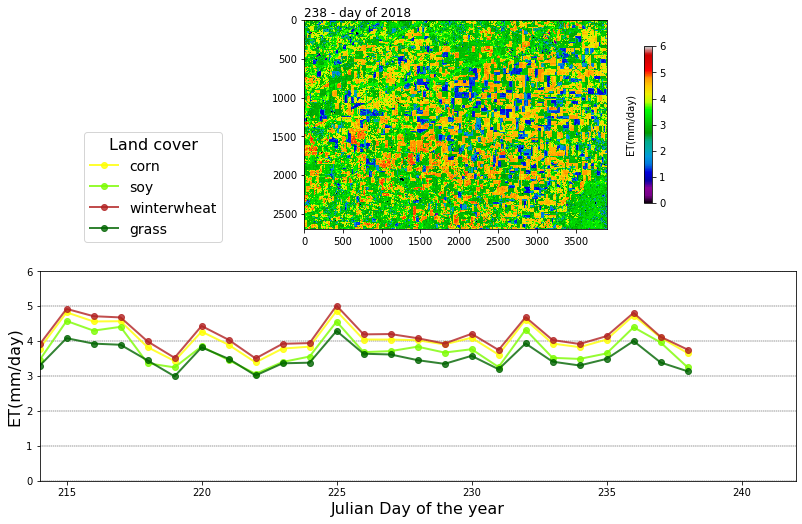

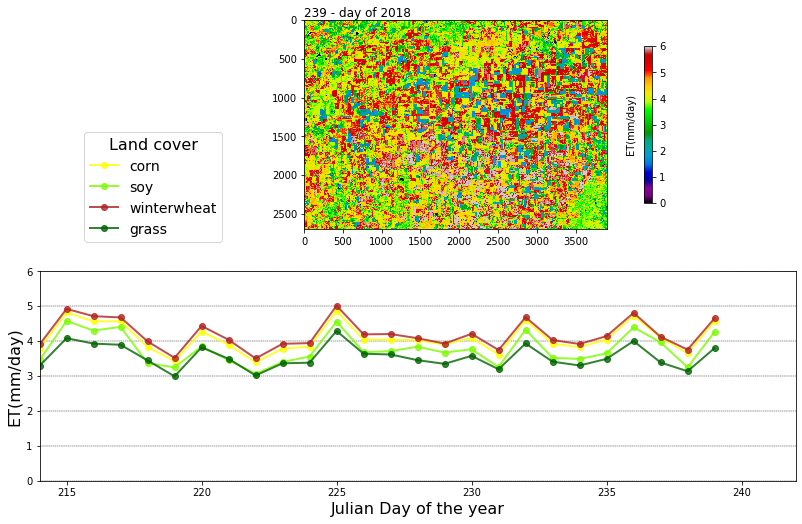

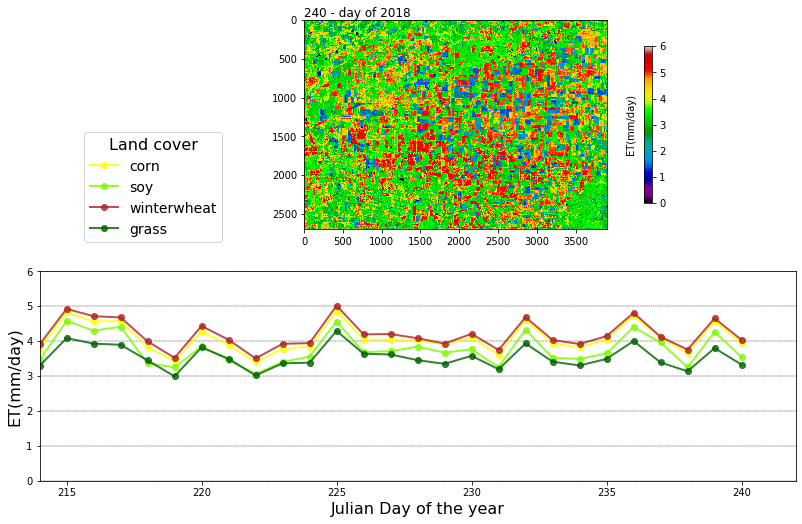

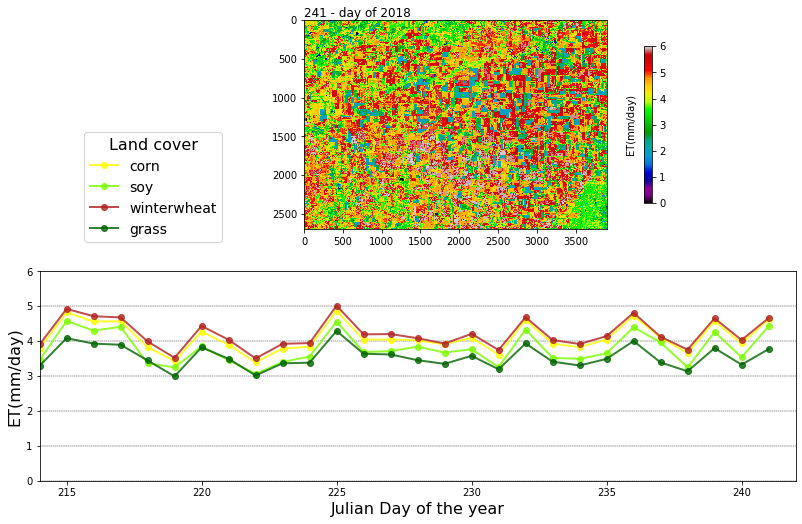

In [11]:
#decalre an empty list
stat_list = []
lc_list = []
day_list = []

warnings.filterwarnings('ignore') 

print('wait to save images/plots')
# call the image for stats
for i in range(start_date, end_date):
    day_day = i+1 -(start_date)
    print(day_day)
    
    grefed_image = ras.open("C:\\Users\\User\\Desktop\\temp\\"+"et"+str(i)+".tif")
    stat_band = grefed_image.read(1)
    
    # itereate over zone list
    for shape_geo in zone_list:
        for row in shape_geo.iterrows():
            row_value = row[1]
            #print(row_value.LC_zone)
            lc_list.append(row_value.LC_zone)
        
        # find stats for current image current zone
        stat_dict = zonal_stats(shape_geo, stat_band, affine=affine_dt, nodata=-999, stats=['mean'])
        #print(stat_dict)
        stat_list.append(stat_dict[0])
        day_list.append(i)
        
        #buiding the data frame
    run_df = pd.DataFrame(stat_list)
    run_df['lc'] = lc_list
    run_df['day'] = day_list
    
    
    
    # restructure for plotting
    piv_df = run_df.pivot(index='day', columns='lc', values='mean')
    # delete cycle-1 copy
    
    piv_df.to_csv(str(i)+".csv")
    
    if i == start_date:
        #piv_df.to_csv(str(i)+".csv")
        vis_df = pd.read_csv(str(i)+".csv")
        #print(vis_df)
        
        
        plot_graphics(vis_df, stat_band, start_date, end_date)
        #drawing graphics
            
    else:
        run2_df = pd.read_csv(str(i)+".csv")
        #print(run2_df)
        vis_df = pd.read_csv(str(i-1)+".csv")
        
        
        vis_df.append(run2_df)
        #print(vis_df)
        run2_df.to_csv(str(i)+".csv")
        #os.remove(str(i-1)+".csv")
        
        plot_graphics(run2_df, stat_band, start_date, end_date)
        

print('******************************************')
print('*********** Task completed ***************')

### Generating gif file

In [12]:
os.chdir("C:\\Users\\User\\Desktop\\temp\\")
# adding pngs here
png_list = glob.glob("*.png")
png_list

# empty image array declaration
gif_list= []

# append the array with each image
for png_files in png_list:
    gif_list.append(imageio.imread(png_files))

# change the speed adjesting the duration
imageio.mimwrite("C:\\Users\\User\\Desktop\\temp\\animatedET.gif", gif_list, duration=0.4)


In [ ]:
#reference
#https://simpson.ca.uky.edu/files/corn_and_soybean_production_calendar.pdf   
#https://books.google.com/books?id=cc9iDGe4A_AC&pg=PA327&lpg=PA327&dq=why+soy+has+high+NPP+than+corn&source=bl&ots=0cdgyeue-x&sig=ACfU3U1ENQsVSAt8o2GMwA4wBWXRRuU6vQ&hl=en&sa=X&ved=2ahUKEwiA_bmjhJLqAhWaZ80KHYHeD5QQ6AEwAXoECAkQAQ#v=onepage&q=why%20soy%20has%20high%20NPP%20than%20corn&f=false